## EE634 HW2 
### Kutay Ugurlu 2232841

In [151]:

import numpy as np 
from numpy.linalg import eig
from matplotlib import pyplot as plt 
from scipy.linalg import hadamard
from skimage.color import rgb2gray
from scipy.fft import fft, ifft, fft2, ifft2, dct, dctn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools 
%matplotlib inline

# Q1

## a

In [9]:
def Hadamard_doubler(H):
    H_double_first_row = np.hstack((H,H))
    H_double_second_row = np.hstack((H,-1*H))
    return 1/np.sqrt(2) * np.vstack((H_double_first_row,H_double_second_row))

def HadamardMtx(N:int):
    H = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
    for _ in range(1,N):
        H = Hadamard_doubler(H)
    return H
    

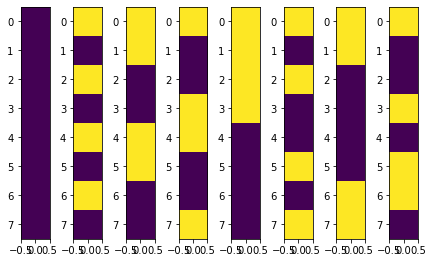

In [10]:
I = np.eye(8)
A = HadamardMtx(3)
B = np.empty(A.shape)
for i in range(8):
    basis_vector = I[:,i]
    transformed_basis_vec = np.expand_dims(A.dot(basis_vector),-1)
    
    plt.subplot(1,8,i+1)
    plt.imshow(transformed_basis_vec)
    B[:,i] = A.dot(basis_vector)

plt.tight_layout()

## b

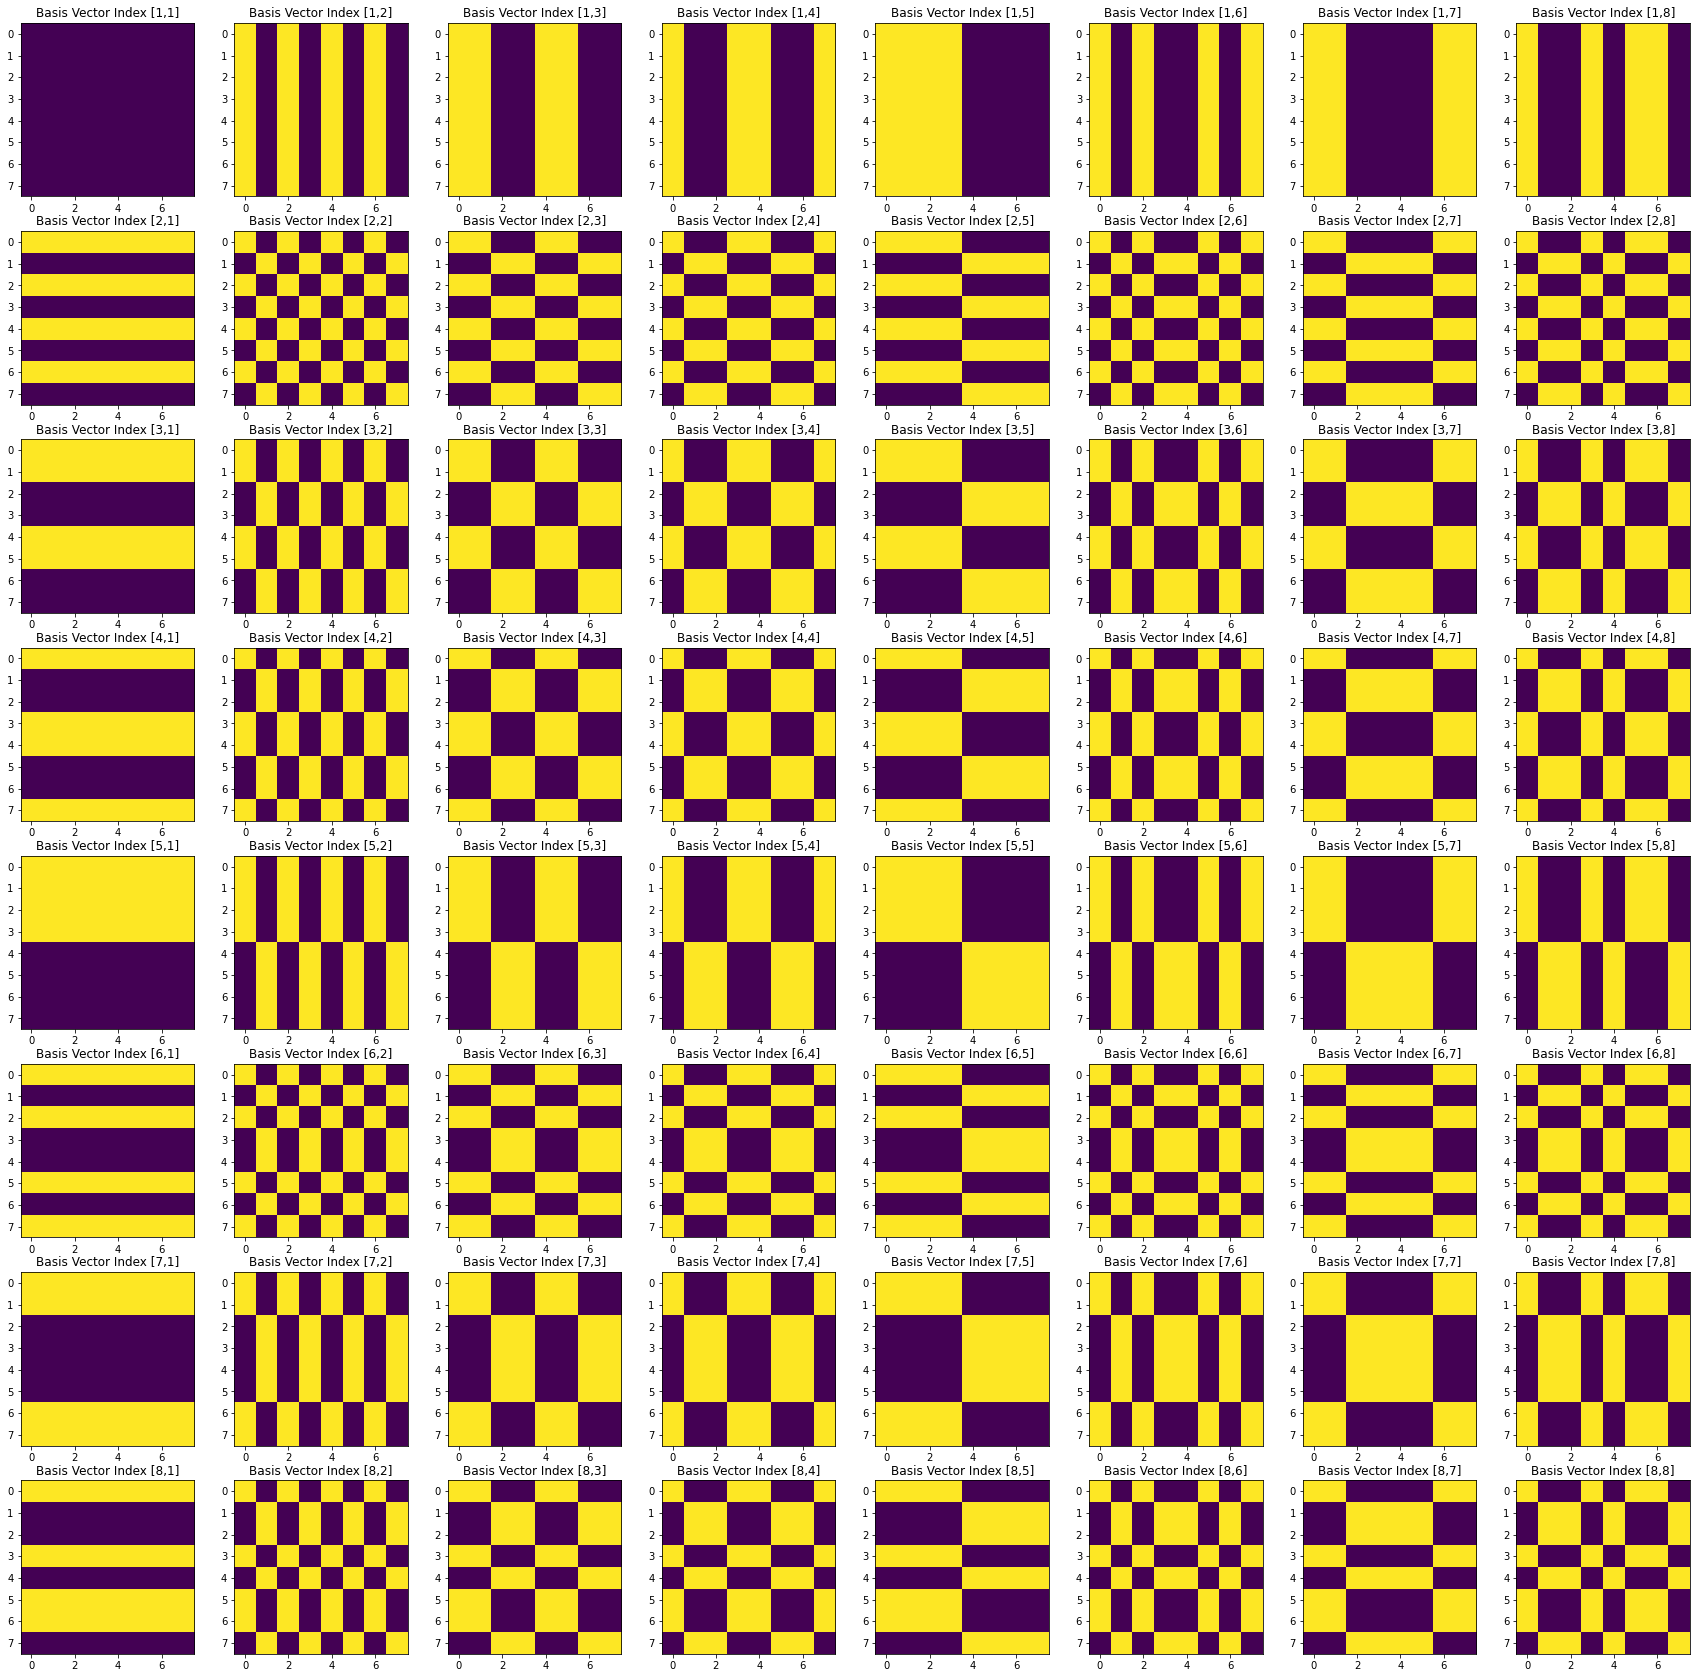

In [11]:
H = HadamardMtx(3)
plt.figure(figsize=(30,30))
for i in range(8):
    for j in range(8):
        basis_vec = np.zeros((8,8))
        basis_vec[i,j] = 1
        hadamard_basis_vec = H.dot(basis_vec).dot(H.T)#np.outer(B[:,i],B[:,j]) # 2D transform with 1D transform matrices
        plt.subplot(8,8,8*(i)+(j+1))
        plt.imshow(hadamard_basis_vec)
        plt.title("Basis Vector Index ["+str(i+1)+","+str(j+1)+"]")


## c

All Transformed matrices are the same! The last trial: 


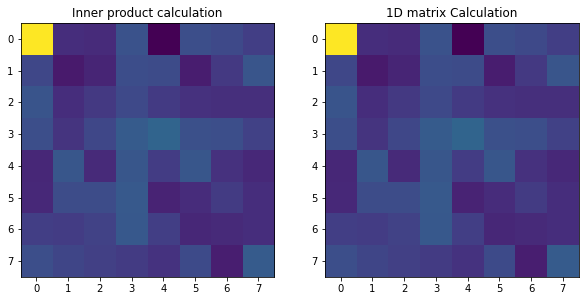

In [12]:
N = 3
for trial in range(50):
    H = HadamardMtx(N)
    T_inner_prod = np.zeros_like(H)
    I = np.random.randint(1,20,(2**N,2**N))
    for row in range(2**N):
        for col in range(2**N):
            basis_vec = np.zeros((2**N,2**N))
            basis_vec[row,col] = 1
            hadamard_basis_vec = H.dot(basis_vec).dot(H.T)
            T_inner_prod[row,col] = np.trace(hadamard_basis_vec.conj().T.dot(I))
    T_mtx = H.dot(I).dot(H)
    assert np.all(np.isclose(T_mtx,T_inner_prod))
print("All Transformed matrices are the same! The last trial: ")
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(T_inner_prod)
plt.title("Inner product calculation")
plt.subplot(1,2,2)
plt.imshow(T_mtx)
plt.title("1D matrix Calculation");
    

        

# Q2

## a

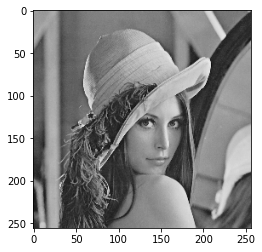

In [13]:
Lena = plt.imread("256by256grayscaleLena.png")
Lena = rgb2gray(Lena[...,:-1])
plt.imshow(Lena, cmap="gray")

## b

In [14]:
def zero_mean_cols(img):
    return (img.T - img.mean(axis=1)).T

def cov(img):
    if len(img.shape) == 1:
        return np.outer(img,img.conj())
    img = zero_mean_cols(img)
    return img.dot(img.T.conj())

def KLT_mtx(img):
    C_img = cov(img)
    w_vl = eig(C_img)
    return w_vl[1].T

def diagonal_coef_ratio(cov_mtx):
    cov_mtx = np.abs(cov_mtx)
    print("\nDiagonal Coefficients Value Ratio:",(np.trace(cov_mtx)) / np.sum(cov_mtx))


Diagonal Coefficients Value Ratio: 0.014061467


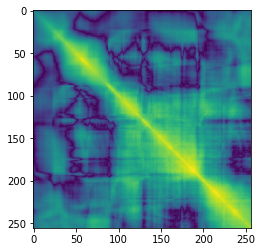

In [15]:
img = Lena
Cov_Lena = cov(img)
diagonal_coef_ratio((Cov_Lena))
plt.imshow(np.log(1+np.abs(Cov_Lena)))


Diagonal Coefficients Value Ratio: 0.1365569


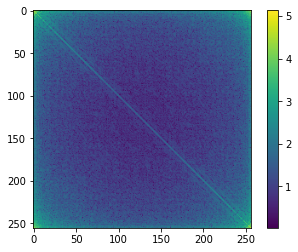

In [16]:
img = fft(Lena,axis=0)
Cov_Lena = np.abs(cov((img)))
diagonal_coef_ratio((Cov_Lena))
plt.imshow(np.log10(1+np.abs((Cov_Lena))))
plt.colorbar();


Diagonal Coefficients Value Ratio: 0.13431993


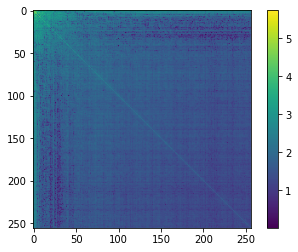

In [17]:
img = np.abs(dct(Lena,axis=0))

Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
plt.colorbar();


Diagonal Coefficients Value Ratio: 0.99997926


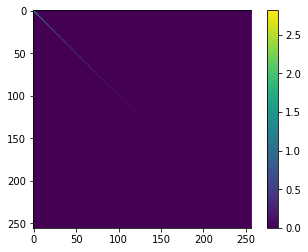

In [18]:
A = KLT_mtx(Lena)
img = A.dot(Lena)
Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
plt.colorbar();

KLT concentrated the content of the covariance matrix in the diagonal of it, by finding the linear transform on image that diagonalizes its covariance matrix, _i.e._ decorrelating matrix. 

## c


Diagonal Coefficients Value Ratio: 0.0039185826153480575


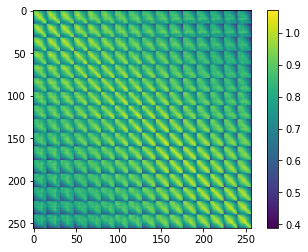

In [19]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2))
counter = 0
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        container[:,counter] = patch.flatten()
        counter += 1
diagonal_coef_ratio(container)
plt.imshow(np.log10(1+np.abs(cov(container))))
plt.colorbar();
        

## d
### DCT 


Diagonal Coefficients Value Ratio: 0.38328357729601065


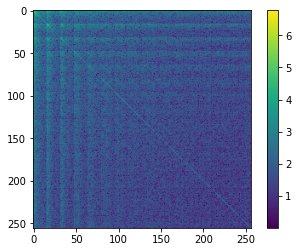

In [47]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2))
counter = 0
new_image = np.zeros_like(Lena)
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        patch = dctn(patch) # This transform is added
        new_image[row_idx1:row_idx2,col_idx1:col_idx2] = patch
        container[:,counter] = patch.flatten()
        counter += 1
diagonal_coef_ratio(cov(container))
plt.imshow(np.log10(1+np.abs(cov(container))))
plt.colorbar();

### DFT 


Diagonal Coefficients Value Ratio: 0.13403696211448685


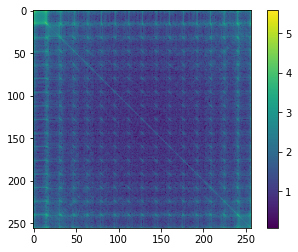

In [48]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2),dtype=complex)
counter = 0
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        patch = fft2(patch) # This transform is added
        container[:,counter] = patch.flatten()
        counter += 1
diagonal_coef_ratio(cov(container))
plt.imshow(np.log10(1+np.abs(cov(container))))
plt.colorbar();

## e
### KLT 


Diagonal Coefficients Value Ratio: 0.9999998049779671


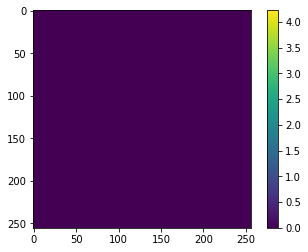

In [90]:
patch_size = 16
s1,_ = Lena.shape
num_horizontal = s1 // patch_size
num_vertical = num_horizontal
size = Lena.size
n_vectors = size // patch_size**2
step = s1 // patch_size
row_begin = 0
container = np.zeros((n_vectors,patch_size**2),dtype=complex)
counter = 0
new_image = np.zeros_like(Lena)
for row in range(patch_size):
    for col in range(patch_size):
        row_idx1 = row*patch_size
        row_idx2 = row*patch_size+step
        col_idx1 = col*patch_size
        col_idx2 = col*patch_size+step
        patch = Lena[row_idx1:row_idx2,col_idx1:col_idx2]
        A = KLT_mtx(patch.flatten()) # This transform is added
        patch = A.dot(patch.flatten())
        container[:,counter] = patch.flatten()
        counter += 1
Cov_Lena = cov(container)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
diagonal_coef_ratio(Cov_Lena)
plt.colorbar();


In [89]:
np.isclose(np.diag(Cov_Lena),0)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

All of the transform performed well to decorrelate the image, they increased the fractional portion of diagonal coefficients in the covariance matrix. Although there is no remarkable difference 1D and 2D DFT, increasing the dimension in the DCT have significantly affected the energy compaction, from 0.13 to 0.38, which is around 200% increase. 

1D KLT performed well in energy compaction, compacting 99% of the energy in the diagonal. In 2D KLT, it is observed that most of the energy is compacted in only one variable. 

# Q3

## a

Text(0.5, 0.98, 'Different Filter Responses for $D_0 = 40$')

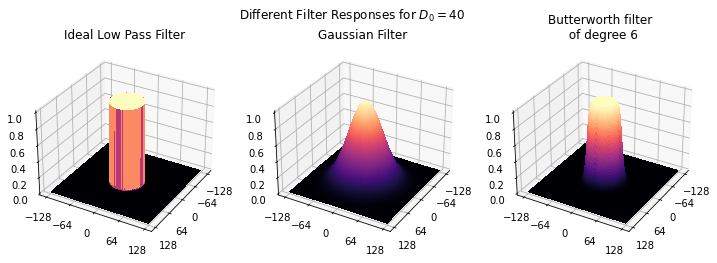

In [23]:
maxsize = 128
minsize = -1*maxsize

X = np.arange(minsize, maxsize, 1)
Y = np.arange(minsize, maxsize, 1)
X, Y = np.meshgrid(X, Y)
D = np.sqrt(X**2+Y**2)
D0 = 40
N_butterworth = 6
sigma_gaussian = D0

H_ideal = (D<D0) * np.ones_like(D)  
H_butterworth = 1 / (1 + (D/D0)**(2*N_butterworth))
H_gaussian = np.exp(-D*D/(2*sigma_gaussian**2))

# Plot the surface.
fig = plt.figure(figsize=plt.figaspect(.33))
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, H_ideal,rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,1)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Ideal Low Pass Filter")

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, H_gaussian,rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,1)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Gaussian Filter")

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, H_butterworth,rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,1)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Butterworth filter \n of degree "+str(N_butterworth))

plt.suptitle(r"Different Filter Responses for $D_0 = 40$")

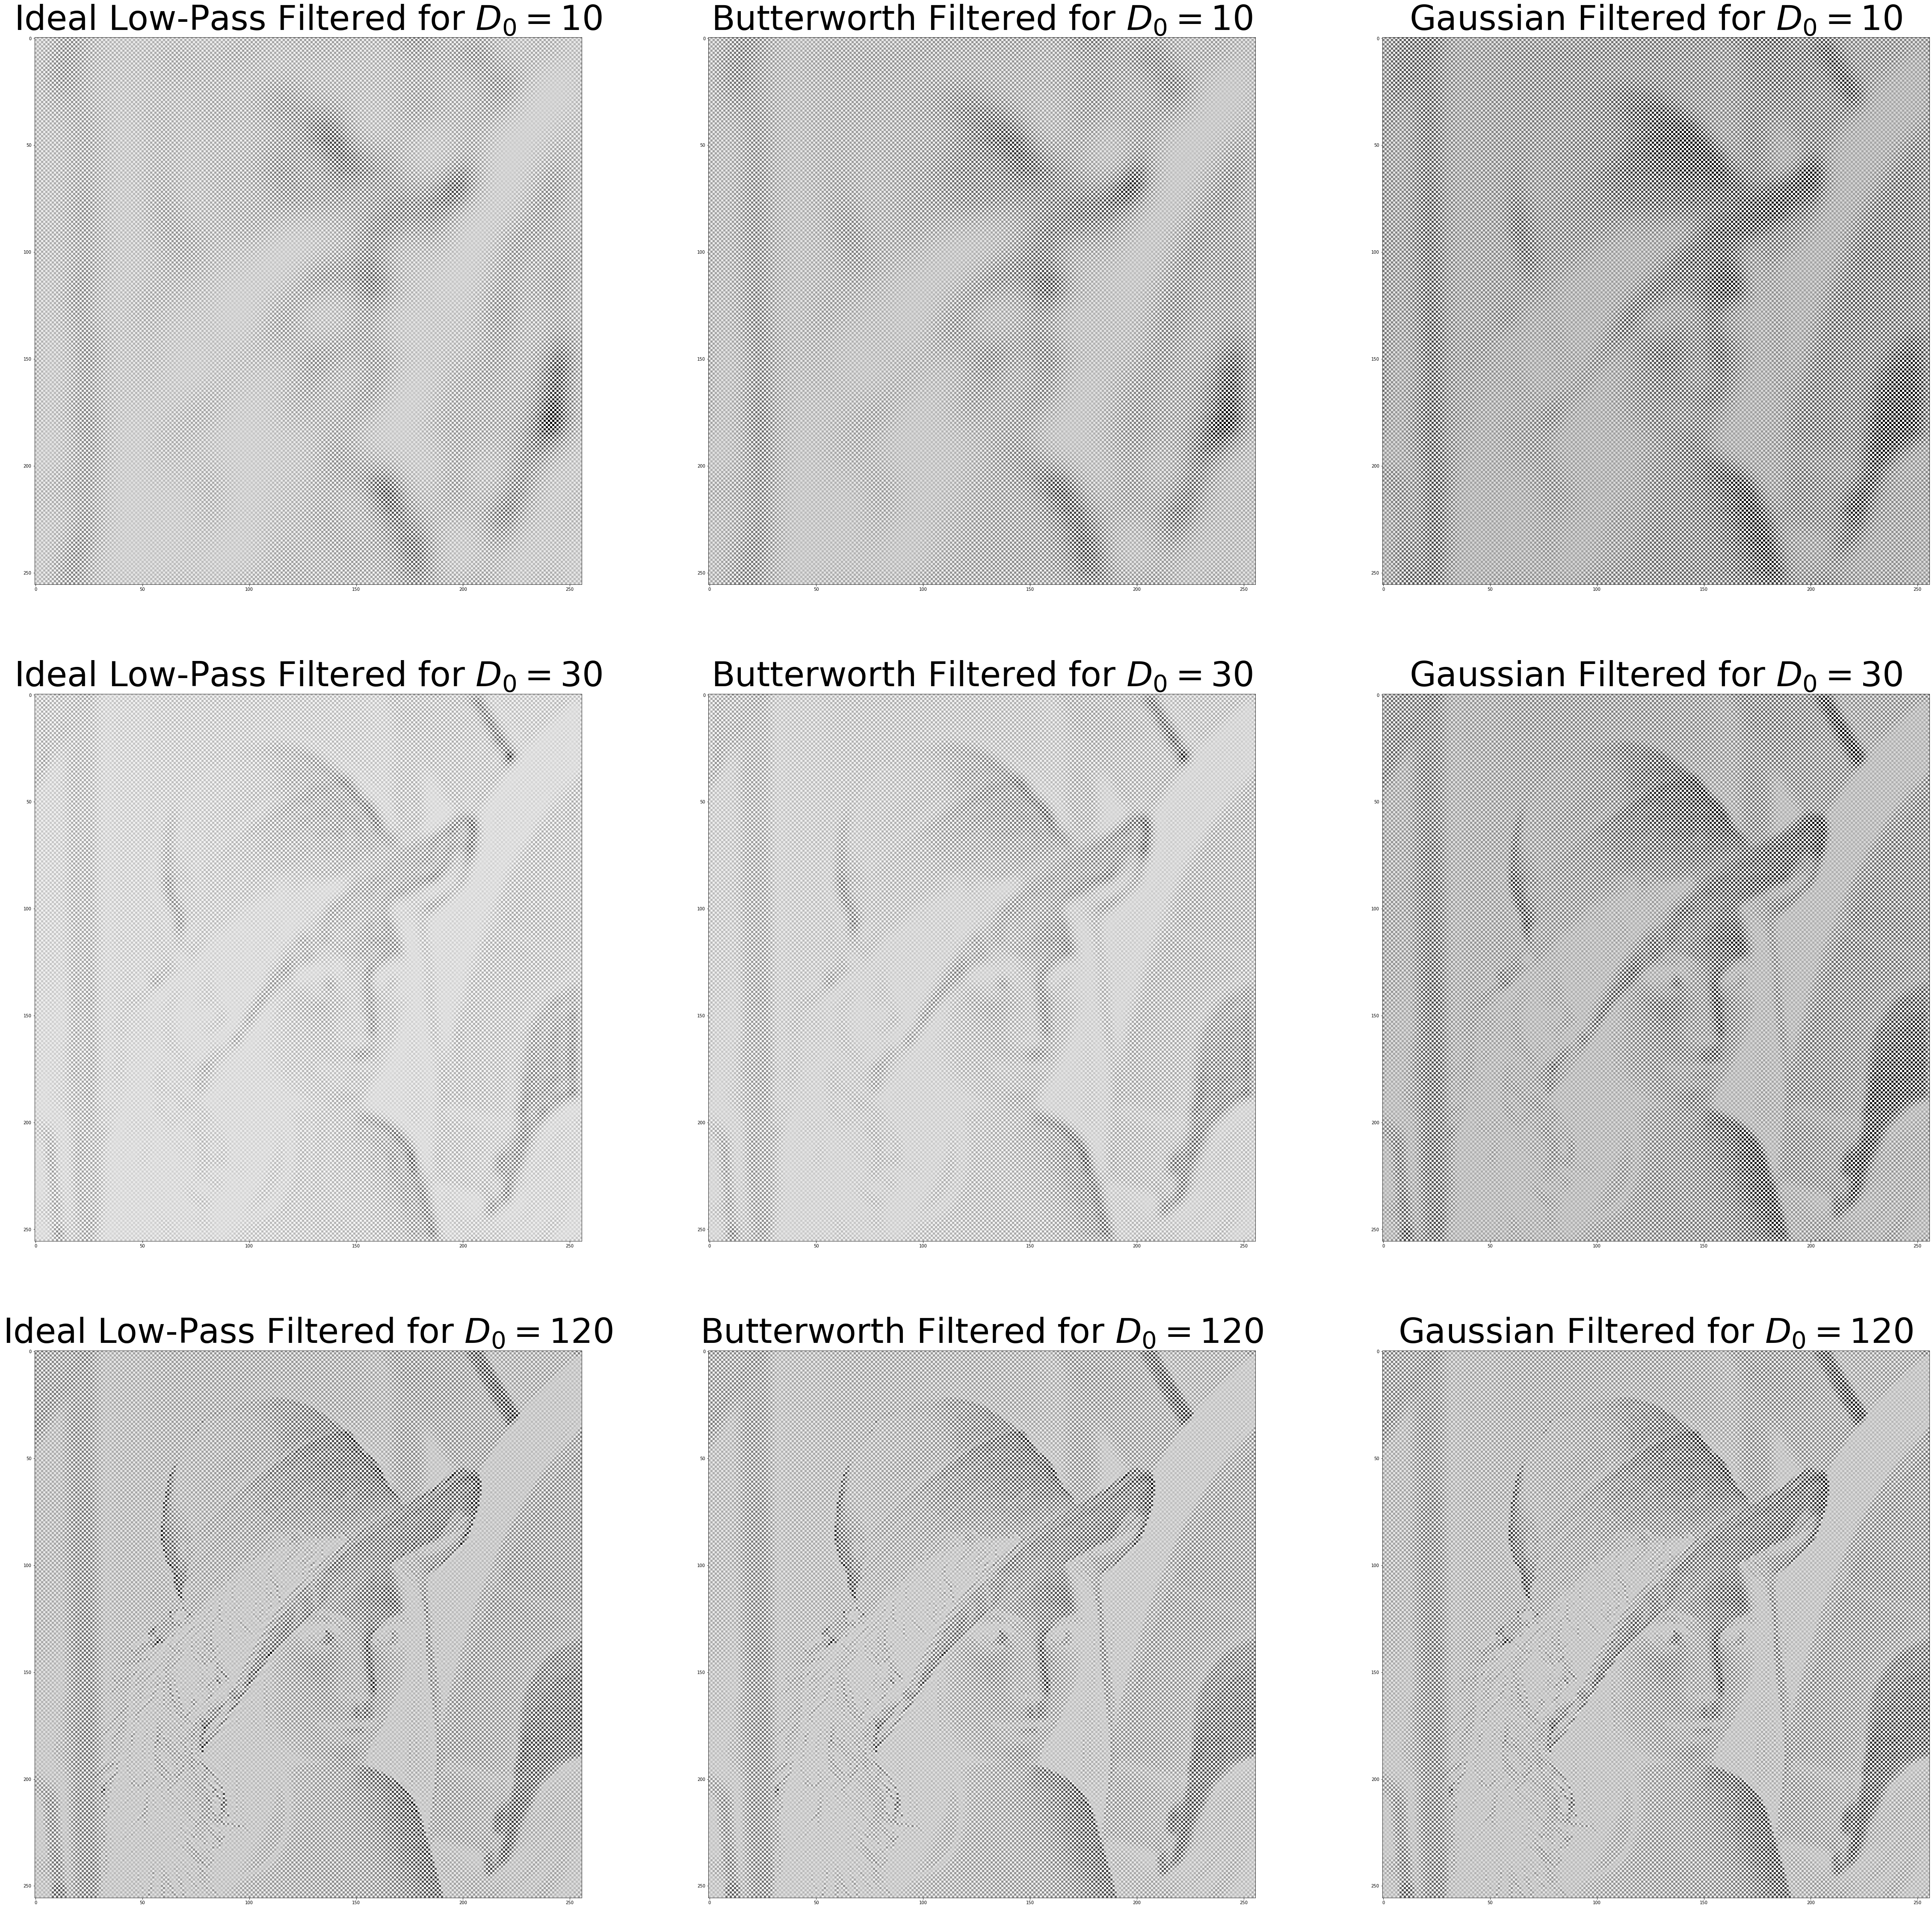

In [24]:
fig = plt.figure(figsize=(80,80))
fontsize = 80
for i,D0 in enumerate([10,30,120]):
    N_butterworth = 6
    sigma_gaussian = D0
    H_ideal = (D<D0) * np.ones_like(D)  
    H_butterworth = 1 / (1 + (D/D0)**(2*N_butterworth))
    H_gaussian = np.exp(-D*D/(2*sigma_gaussian**2))
    Lena_ideal = np.log10(1+np.real(ifft2(np.fft.fftshift(fft2(Lena))*H_ideal)))
    Lena_butterworth = np.log10(1+np.real(ifft2(np.fft.fftshift(fft2(Lena))*H_butterworth)))
    Lena_gaussian = np.log10(1+np.real(ifft2(np.fft.fftshift(fft2(Lena))*H_gaussian)))
    ax = fig.add_subplot(3, 3, (3*i+1))
    plt.imshow(Lena_ideal,cmap="gray")
    ax.set_title(r"Ideal Low-Pass Filtered for $D_0 = {}$".format(D0),fontsize=fontsize)

    ax = fig.add_subplot(3, 3, (3*i+2))
    plt.imshow(Lena_butterworth,cmap="gray")    
    ax.set_title(r"Butterworth Filtered for $D_0 = {}$".format(D0),fontsize=fontsize)

    ax = fig.add_subplot(3, 3, (3*i+3))
    plt.imshow(Lena_gaussian,cmap="gray")
    ax.set_title(r"Gaussian Filtered for $D_0 = {}$".format(D0),fontsize=fontsize)
    

    


# Q4

## a

In [25]:
%pip install PyWavelets
import pywt

Text(0.5, 1.0, 'Diagonal')

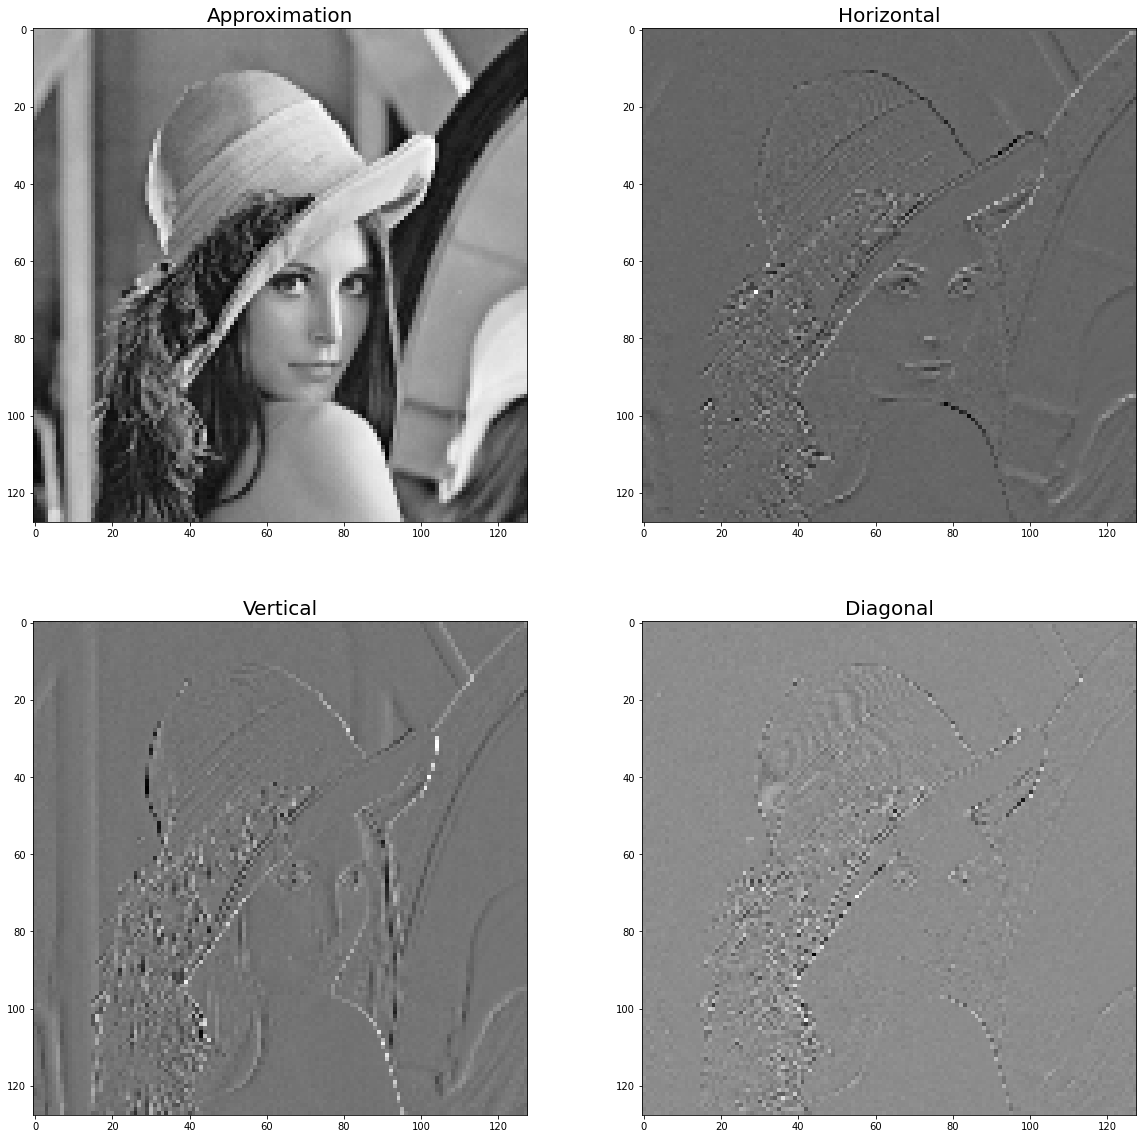

In [26]:
J1_coeffs = pywt.dwt2(Lena, "Haar", mode='symmetric', axes=(-2, -1))
cA, (cH, cV, cD) = J1_coeffs
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA,cmap="gray")
plt.title("Approximation",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(cH,cmap="gray")
plt.title("Horizontal",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(cV,cmap="gray")
plt.title("Vertical",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(cD,cmap="gray")
plt.title("Diagonal",fontsize=20)




In [27]:
J2_coeffs = pywt.wavedec2(Lena, "Haar", mode='symmetric', level=2, axes=(-2, -1))

(cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)) = J2_coeffs


Text(0.5, 0.98, 'Level 1 Coefficients')

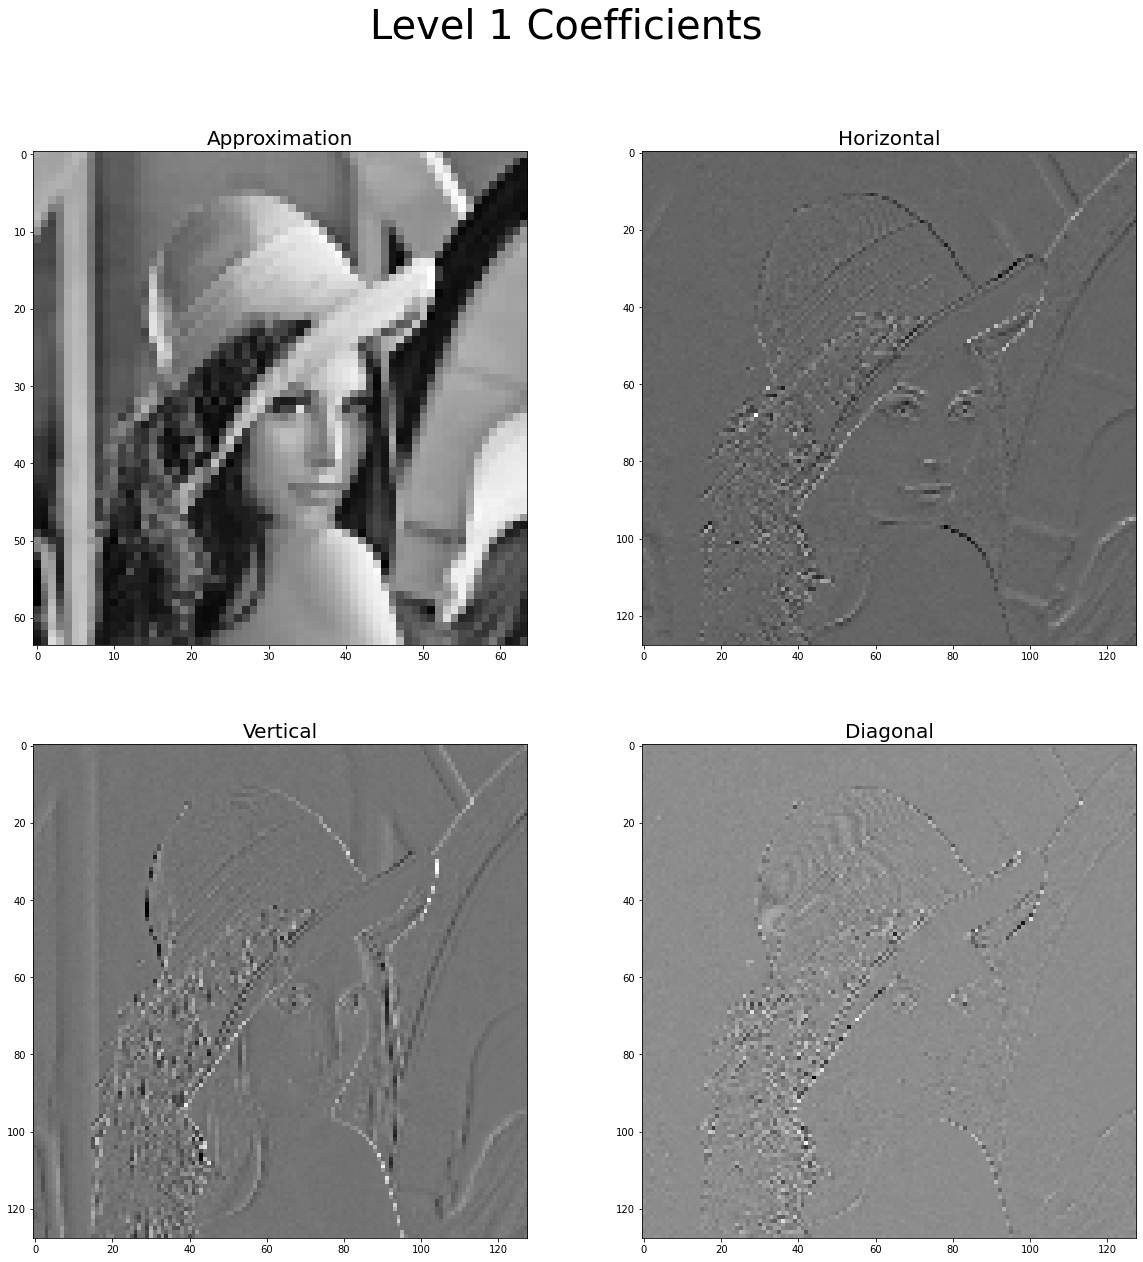

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA2,cmap="gray")
plt.title("Approximation",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(cH1,cmap="gray")
plt.title("Horizontal",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(cV1,cmap="gray")
plt.title("Vertical",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(cD1,cmap="gray")
plt.title("Diagonal",fontsize=20)
plt.suptitle("Level 1 Coefficients",fontsize=40)


Text(0.5, 0.98, 'Level 2 Coefficients')

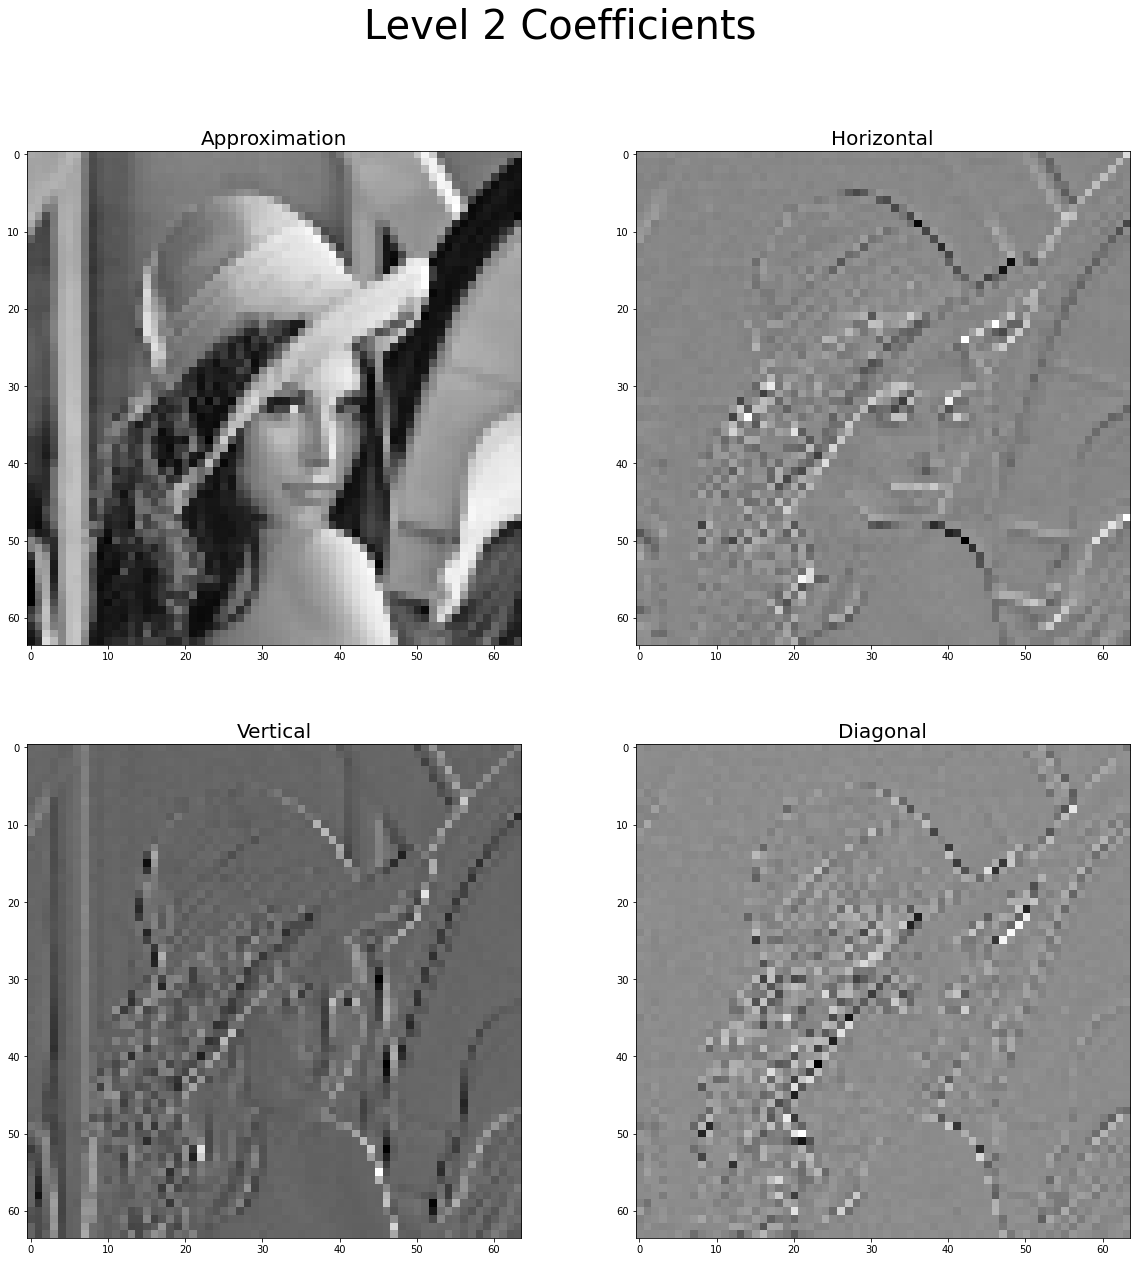

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(cA2,cmap="gray")
plt.title("Approximation",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(cH2,cmap="gray")
plt.title("Horizontal",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(cV2,cmap="gray")
plt.title("Vertical",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(cD2,cmap="gray")
plt.title("Diagonal",fontsize=20)
plt.suptitle("Level 2 Coefficients",fontsize=40)


## c

In [30]:
s1,s2 = Lena.shape
Noisy_Lena = Lena + 0.2*np.random.randn(s1,s2)

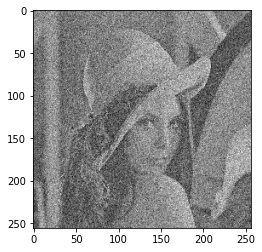

In [31]:
plt.imshow(Noisy_Lena,cmap="gray")

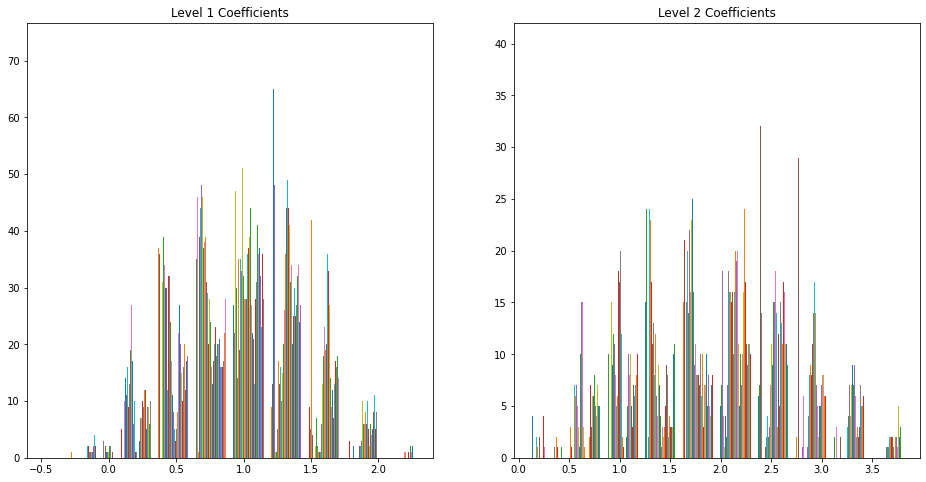

In [32]:
plt.figure(figsize=(16,8))
J2_coeffs = pywt.wavedec2(Noisy_Lena, "Haar", mode='symmetric', level=2, axes=(-2, -1))
(cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)) = J2_coeffs
J1_coeffs = pywt.dwt2(Noisy_Lena, "Haar", mode='symmetric', axes=(-2, -1))
cA, (cH, cV, cD) = J1_coeffs
plt.subplot(1,2,1)
plt.hist(cA);
# plt.xticks(np.arange(-1,3,0.25))
plt.title("Level 1 Coefficients")
plt.subplot(1,2,2)
plt.hist(cA2);
plt.title("Level 2 Coefficients");

Number of nonzero elements:
 NNZ1 =  27575 | NNZ2 =  27600


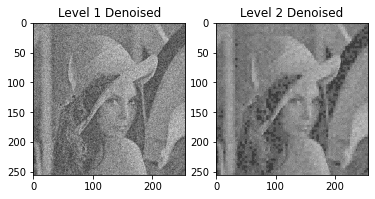

In [179]:
threshold1 = 0.15; threshold2 = 0.8
cA_filtered = np.where(((cA>threshold1)),cA,np.zeros_like(cA))
cH_filtered = np.where(((cH>threshold1)),cH,np.zeros_like(cH))
cV_filtered = np.where(((cV>threshold1)),cV,np.zeros_like(cV))
cD_filtered = np.where(((cD>threshold1)),cD,np.zeros_like(cD))

cA2_filtered = np.where((cA2>threshold2) ,cA2,np.zeros_like(cA2))
cH2_filtered = np.where(((cH2>threshold2)),cH2,np.zeros_like(cH2))
cV2_filtered = np.where(((cV2>threshold2)),cV2,np.zeros_like(cV2))
cD2_filtered = np.where(((cD2>threshold2)),cD2,np.zeros_like(cD2))

J1_coeffs_filtered = (cA_filtered, (cH, cV, cD))
J2_coeffs_filtered = (cA2_filtered, (cH2_filtered, cV2_filtered, cD2_filtered),
                      (cH_filtered, cV_filtered, cD_filtered))
LenaBack_J1 = pywt.waverec2(J1_coeffs_filtered, "Haar", mode='symmetric', axes=(-2, -1))
LenaBack_J2 = pywt.waverec2(J2_coeffs_filtered, "Haar", mode='symmetric', axes=(-2, -1))
NNZ1 = np.sum([np.count_nonzero(item) for item in [cA_filtered,cV_filtered,cH_filtered,cD_filtered]])
NNZ2 = np.sum([np.count_nonzero(item) for item in [cA_filtered,cV_filtered,cH_filtered,cD_filtered,cV2_filtered,cH2_filtered,cD2_filtered]])
print("Number of nonzero elements:\n","NNZ1 = ",str(NNZ1),"| NNZ2 = ",str(NNZ2))

plt.subplot(1,2,1)
plt.imshow(LenaBack_J1,cmap="gray")
plt.title("Level 1 Denoised")
plt.subplot(1,2,2)
plt.imshow(LenaBack_J2,cmap="gray")
plt.title("Level 2 Denoised");


In [180]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
Lena_img = Lena.astype("float64")
ssim1 = structural_similarity(Lena_img,LenaBack_J1,);
psnr1 = peak_signal_noise_ratio(Lena_img,LenaBack_J1);
ssim2 = structural_similarity(Lena_img,LenaBack_J2);
psnr2 = peak_signal_noise_ratio(Lena_img,LenaBack_J2);
print("SSIM1 = ",str(ssim1),"| SSIM2 = ",str(ssim2))
print("PSNR1 = ",str(psnr1),"| PSNR2 = ",str(psnr2))


SSIM1 =  0.25034735500786826 | SSIM2 =  0.32004507318131287
PSNR1 =  13.911742443674786 | PSNR2 =  16.44850101383799


With very close non-zero wavelet coefficients for 1 and 2 level DWTs, denoising via hard thresholding 2 level DWT transform performed better. This may be attributed to the fact that multilevel transform have better capability to decompose the low frequency content in finer scale. Hence, in both of the metrics(Peak Signal-to-Noise Ratio and Structural Similarity Index), multilevel transform exhibited more successful denoising.